In [3]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [4]:
alfa_x = 2.7
betta_x = 3.1
a_x = 8

alfa_y = 5.1
betta_y = 3.1
a_y = 6

In [18]:
def funcL(data):
    return np.exp(-np.abs(data) ** 3)

In [19]:
def funcR(data):
    return 1 / (1 + np.abs(data) ** 4)

In [20]:
def dataL(data, a, alfa):
    dataL = list()
    
    for i in data:
        dataL.append((a - i) / alfa)
    
    return dataL

In [21]:
def dataR(data, a, betta):
    dataR = list()
    
    for i in data:
        dataR.append((i - a) / betta)
        
    return dataR

In [22]:
def arithmetic(operation : str):
    
    data_x_right = np.linspace(a_x, a_x + betta_x, 1000)
    data_x_left = np.linspace(a_x - alfa_x, a_x, 1000)
#     data_x = np.concatenate((data_x_left, data_x_right), axis = 0)
    L_x = funcL(dataL(data_x_left, a_x, alfa_x))
    R_x = funcR(dataR(data_x_right, a_x, betta_x))
#     x = np.concatenate((L_x, R_x), axis = 0)
    
    data_y_right = np.linspace(a_y, a_y + betta_y, 1000)
    data_y_left = np.linspace(a_y - alfa_y, a_y, 1000)
#     data_y = np.concatenate((data_y_left, data_y_right), axis = 0)
    L_y = funcL(dataL(data_y_left, a_y, alfa_y))
    R_y = funcR(dataR(data_y_right, a_y, betta_y))
#     y = np.concatenate((L_y, R_y), axis = 0)
    
    def summ():
        
        a_z = a_x + a_y
        alfa_z = alfa_x + alfa_y
        betta_z = betta_x + betta_y
        
        data_z_right = np.linspace(a_z, a_z + betta_z, 1000)
        data_z_left = np.linspace(a_z - alfa_z, a_z, 1000)
        
        L_z = funcL(dataL(data_z_left, a_z, alfa_z))
        R_z = funcR(dataR(data_z_right, a_z, betta_z))
        
        return data_z_left, L_z, data_z_right, R_z
    
    
    def sub():
        a_z = a_x - a_y
        alfa_z = alfa_x + betta_y
        betta_z = betta_x + alfa_y
        
        data_z_right = np.linspace(a_z, a_z + betta_z, 1000)
        data_z_left = np.linspace(a_z - alfa_z, a_z, 1000)
        
        L_z = funcR(dataL(data_z_left, a_z, alfa_z))
        R_z = funcL(dataR(data_z_right, a_z, betta_z))
        
        return data_z_left, L_z, data_z_right, R_z
    
    
    def mul():
        
        if a_x > 0 and a_y > 0:
            a_z = a_x * a_y
            alfa_z = a_x * alfa_y + a_y * alfa_x
            betta_z = a_x * betta_y + a_y * betta_x
            
            data_z_right = np.linspace(a_z, a_z + betta_z, 1000)
            data_z_left = np.linspace(a_z - alfa_z, a_z, 1000)
        
            L_z = funcL(dataL(data_z_left, a_z, alfa_z))
            R_z = funcR(dataR(data_z_right, a_z, betta_z))
            
        elif a_x < 0 and a_y > 0:
            
            a_z = a_x * a_y
            alfa_z = a_y * alfa_x - a_x * betta_y
            betta_z = a_y * betta_x - a_x * alfa_y
            
            data_z_right = np.linspace(a_z, a_z + betta_z, 1000)
            data_z_left = np.linspace(a_z - alfa_z, a_z, 1000)
        
            L_z = funcL(dataL(data_z_left, a_z, alfa_z))
            R_z = funcR(dataR(data_z_right, a_z, betta_z))
            
        elif a_x < 0 and a_y < 0:
            
            a_z = a_x * a_y
            alfa_z = - a_y * betta_x - a_x * betta_y
            betta_z = - a_y * alfa_x - a_x * alfa_y
            
            data_z_right = np.linspace(a_z, a_z + betta_z, 1000)
            data_z_left = np.linspace(a_z - alfa_z, a_z, 1000)
        
            L_z = funcL(dataL(data_z_left, a_z, alfa_z))
            R_z = funcR(dataR(data_z_right, a_z, betta_z))
        
        return data_z_left, L_z, data_z_right, R_z
    
    
    def div():
        
        if a_x > 0 and (a_x - alfa_x) > 0 and a_y > 0 and (a_y - alfa_y) > 0:
            a_z = a_x / a_y
            alfa_z = (a_x * betta_y + a_y * alfa_x) / pow(a_y, 2)
            betta_z = (a_x * alfa_y + a_y * betta_x) / pow(a_y, 2)
            
            data_z_right = np.linspace(a_z, a_z + betta_z, 1000)
            data_z_left = np.linspace(a_z - alfa_z, a_z, 1000)
        
            L_z = funcL(dataL(data_z_left, a_z, alfa_z))
            R_z = funcR(dataR(data_z_right, a_z, betta_z))
            
            return data_z_left, L_z, data_z_right, R_z
        
        else:
            print('Exeption!')
            
            
    if operation == 'summ':
        data_z_left, L_z, data_z_right, R_z = summ()
        
    elif operation == 'sub':
        data_z_left, L_z, data_z_right, R_z = sub()
        
    elif operation == 'mul':
        data_z_left, L_z, data_z_right, R_z = mul()
        
    elif operation == 'div':
        data_z_left, L_z, data_z_right, R_z = div()
        
    return data_x_left, L_x, data_x_right, R_x, data_y_left, L_y, data_y_right, R_y, data_z_left, L_z, data_z_right, R_z

## Сумма

In [23]:
result = arithmetic('summ')

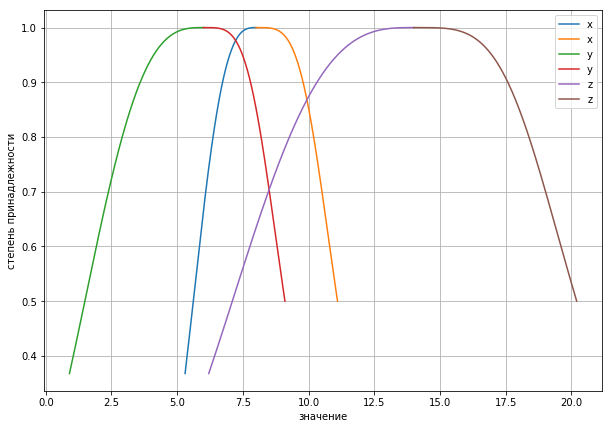

In [24]:
plt.figure(figsize=(10,7))
plt.plot(result[0], result[1], result[2], result[3], label='x')
plt.plot(result[4], result[5], result[6], result[7], label='y')
plt.plot(result[8], result[9], result[10], result[11], label='z')
plt.legend()
plt.grid()
plt.xlabel('значение')
plt.ylabel('степень принадлежности')
plt.show()

## Вычитание

In [25]:
result = arithmetic('sub')

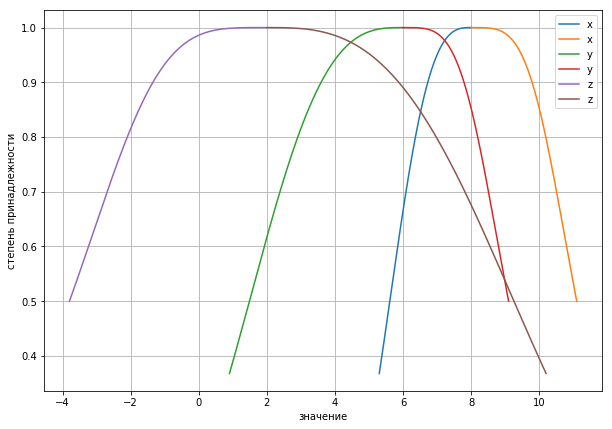

In [26]:
plt.figure(figsize=(10,7))
plt.plot(result[0], result[1], result[2], result[3], label='x')
plt.plot(result[4], result[5], result[6], result[7], label='y')
plt.plot(result[8], result[9], result[10], result[11], label='z')
plt.legend()
plt.grid()
plt.xlabel('значение')
plt.ylabel('степень принадлежности')
plt.show()

## Умножение

In [331]:
result = arithmetic('mul')

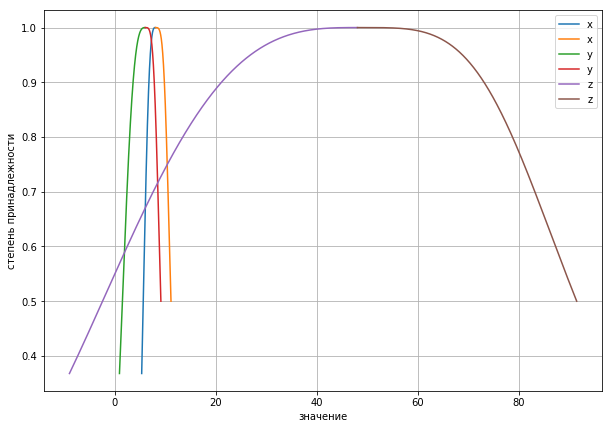

In [332]:
plt.figure(figsize=(10,7))
plt.plot(result[0], result[1], result[2], result[3], label='x')
plt.plot(result[4], result[5], result[6], result[7], label='y')
plt.plot(result[8], result[9], result[10], result[11], label='z')
plt.legend()
plt.grid()
plt.xlabel('значение')
plt.ylabel('степень принадлежности')
plt.show()

## Деление

In [333]:
result = arithmetic('div')

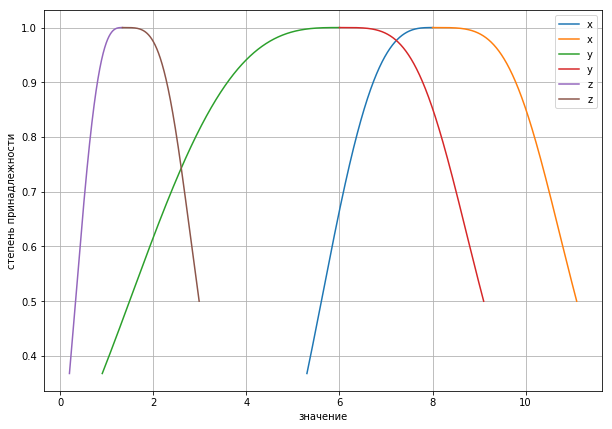

In [334]:
plt.figure(figsize=(10,7))
plt.plot(result[0], result[1], result[2], result[3], label='x')
plt.plot(result[4], result[5], result[6], result[7], label='y')
plt.plot(result[8], result[9], result[10], result[11], label='z')
plt.legend()
plt.grid()
plt.xlabel('значение')
plt.ylabel('степень принадлежности')
plt.show()